# Introduction

The multi-armed bandit problem is a well known and widely cited example of basic reinforcement learning theory. It takes its terminology from a casino. You are faced with a wall of slot machines, each with it own lever or arm (bandits). Each bandit has its own respective probability distribution of success. The objective is to pull the arms one-by-one in sequence such that you maximize your total reward over a series of 'pulls' (episodes). Since you cannot know the true bandit probability distributions, you must design a "trial and error" strategy for selecting the 'best' bandit out of the group of bandits. 

## Epsilon-Greedy
To solve this problem and maximize my reward (highest cumlative average in this case), I am going to run a series of experiments that leverage the epsilon-greedy technique. At a high level, epsilon-greedy balances **exploration** and **exploitation** methods whereby it switches between "exploring" (information gathering) and "exploiting" ("doubling down" on the best decision given current information). Put in other words,'Epsilon' refers to the percent of time that the agent (function) takes a randomly selected action (exploration) rather than taking the action that is most likely to maximize reward given what it knows so far (exploitation). 

## Comparing Different Epsilons
For my first experiment, I'm going to measure the impact of different values of epsilon; specifically how changing this value  changes expected rewards. For my first round, I'm going to use .01, .05, .1, .2 for epsilon and test across three different bandits.



In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create a bandit class
class Bandit:
  def __init__(self, m):#takes in one parameter M, which is the true mean
    self.m = m
    self.mean = 0 #the mean instance variable is the current estimate of the bandit's mean
    self.N = 0

#create pull function which simulates pulling the bandit's arm
  def pull(self):
    return np.random.randn() + self.m #Return a sample (or samples) from the “standard normal” distribution

#takes in x which is the latest sample received from the bandit
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [3]:
#takes in three different means, each corresponding to one of the 3 bandits
#takes in eps so we can perform epsilon greedy
#takes in N, the number of times it will pull
#the function will return an array containing the cumulative average after every play/pull
#and plots corresponding to each epsilon value
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

#results kept in an array data
  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    #generate a random number P between zero and 1
    p = np.random.random()
    #if p is less than eps, we choose a bandit at random
    if p < eps: #explore
      j = np.random.choice(3)
    else: #exploit, choose the bandit with the best current sample mean
      j = np.argmax([b.mean for b in bandits])
    #pull the 'best' bandit
    x = bandits[j].pull()
    #Update the bandit with the reward from most recent pull, and save x
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  #used for easy visual comparison
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  #Plot on a log scale in order to see the fluctuations in the earlier rounds more clearly
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average


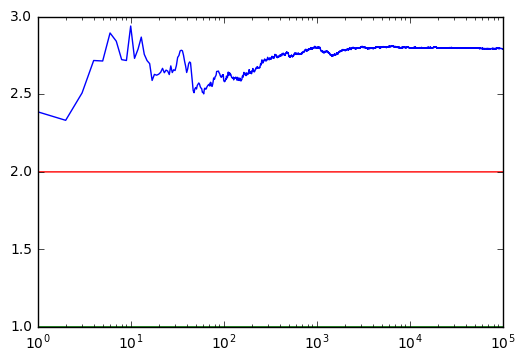

1.0053225221657918
1.991096485335972
2.9962041402136808


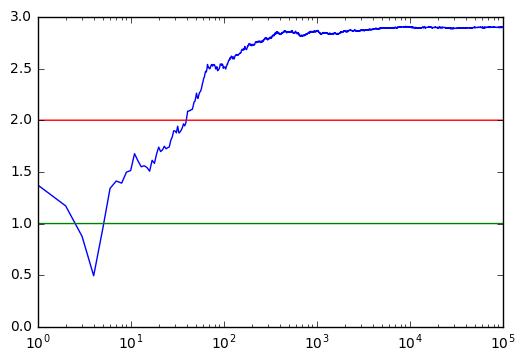

1.005726263643208
2.0100487735413672
2.998156991700558


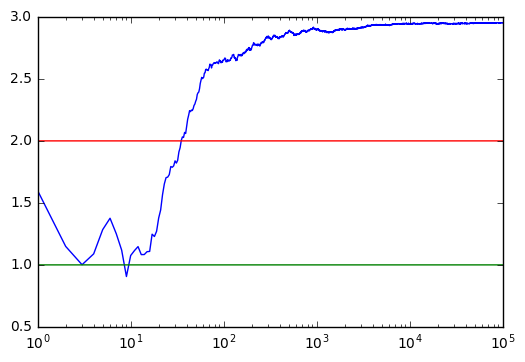

0.9971448522684774
2.0130015182904972
3.0021883658005315


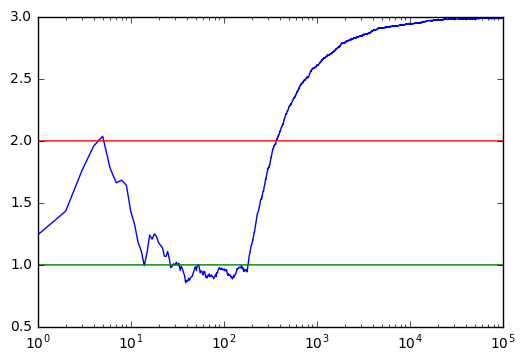

0.9869933600361761
1.9707885313003195
3.001458602455856


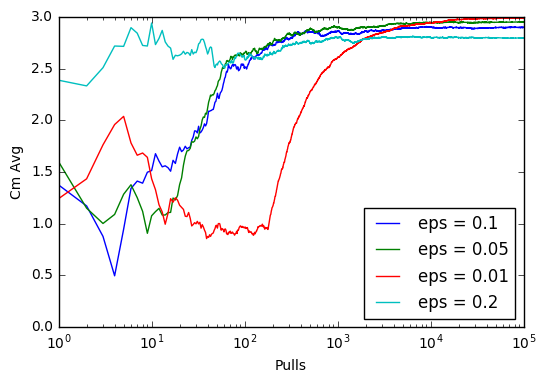

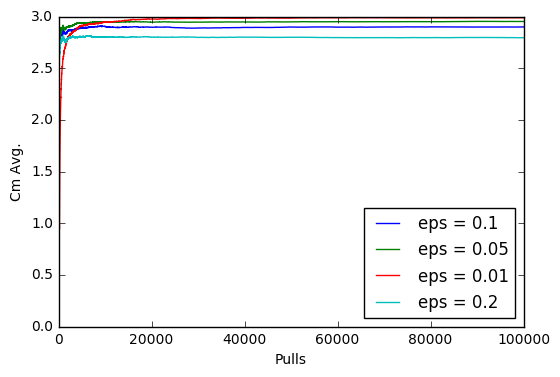

In [9]:
#perform the experiment 4 times, each with a different epsilon
if __name__ == '__main__':
  c_2 = run_experiment(1.0, 2.0, 3.0, 0.2, 100000)
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)


  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg')
  plt.xscale('log')
  plt.legend(loc='lower right')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg.')
  plt.legend(loc='lower right')
  plt.show()


Looking at the results, it appears the more'greedy' the function is, the higher the rewards. Eps 0.01 is spending the least amount of time exploring. You can see this most clearly when looking between 10^2 - 10^5; the less greedy functions fluctuate much more than eps .01 which is steadly increases after 'locking' on to the best performing bandit

## Decreasing Variance

I'm curious to see if the above will remain true (more greedy = higher returns) if we decrease the variance between means

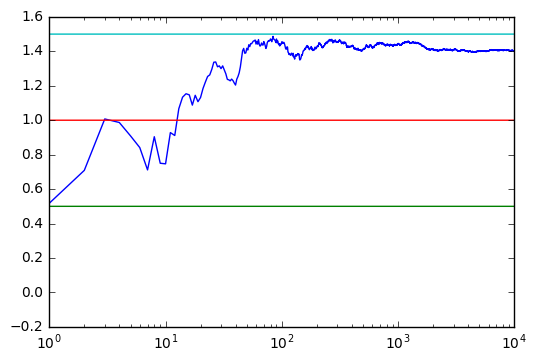

0.48229005538312475
0.9932385780938289
1.500778458902789


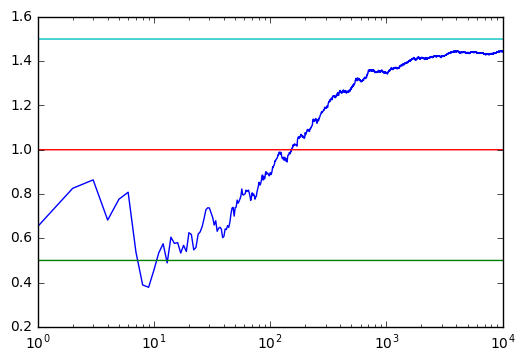

0.5592745782329135
0.9345315358417223
1.4992228002450274


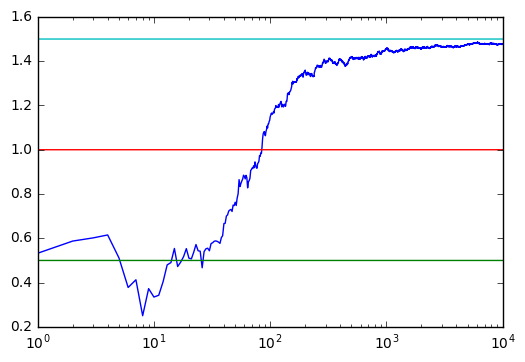

0.44672494768421517
0.9427777536819514
1.5060928018363968


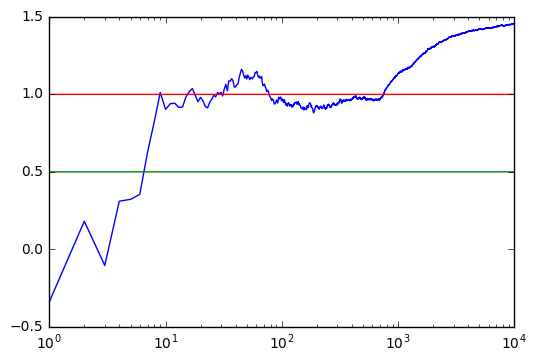

0.4028545418880951
0.9802582762289873
1.4995655617031107


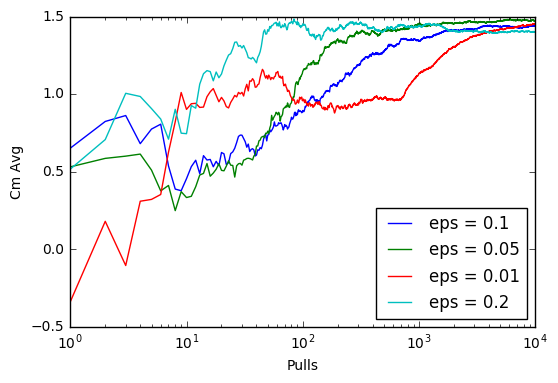

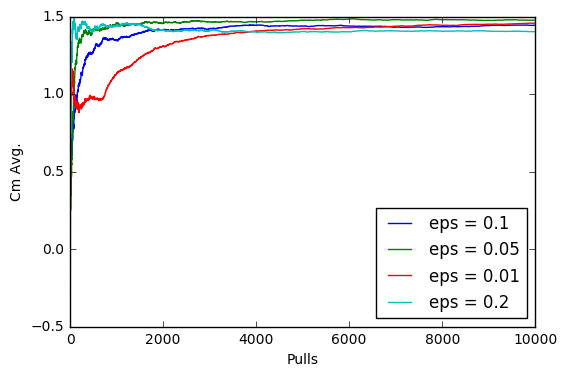

In [12]:
#perform the experiment 4 times, this time decreasing the 
if __name__ == '__main__':
  c_2 = run_experiment(0.5, 1.0, 1.5, 0.2, 10000)
  c_1 = run_experiment(0.5, 1.0, 1.5, 0.1, 10000)
  c_05 = run_experiment(0.5, 1.0, 1.5, 0.05, 10000)
  c_01 = run_experiment(0.5, 1.0, 1.5, 0.01, 10000)


  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg')
  plt.xscale('log')
  plt.legend(loc='lower right')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg.')
  plt.legend(loc='lower right')
  plt.show()

When decreasing the variance between bandit means, the cumulative avg for each experiment (eps value) decreased significantly. Decreasing the variance made it harder for the function to determine which bandit was most optimal; probability distributions overlapped much more than the previous case. Additionally, it appears that eps .05 was the highest performer. With lower variance, differences are harder to detect and thus require a little more exploration

## Adjusting the mean instance variable

In [19]:
#create a bandit class
class Bandit2:
  def __init__(self, m):#takes in one parameter M, which is the true mean
    self.m = m
    self.mean = 1 #change from 
    self.N = 0

#create pull function which simulates pulling the bandit's arm
  def pull2(self):
    return np.random.randn() + self.m #Return a sample (or samples) from the “standard normal” distribution

#takes in x which is the latest sample received from the bandit
  def update2(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x
#takes in three different means, each corresponding to one of the 3 bandits
#takes in eps so we can perform epsilon greedy
#takes in N, the number of times it will pull
#the function will return an array containing the cumulative average after every play/pull
#and plots corresponding to each epsilon value
def run_experiment2(m1, m2, m3, m4, m5, eps, N):
  bandits = [Bandit2(m1), Bandit2(m2), Bandit2(m3), Bandit2(m4), Bandit2(m5)]

#results kept in an array data
  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    #generate a random number P between zero and 1
    p = np.random.random()
    #if p is less than eps, we choose a bandit at random
    if p < eps: #explore
      j = np.random.choice(5)
    else: #exploit, choose the bandit with the best current sample mean
      j = np.argmax([b.mean for b in bandits])
    #pull the 'best' bandit
    x = bandits[j].pull2()
    #Update the bandit with the reward from most recent pull, and save x
    bandits[j].update2(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  #used for easy visual comparison
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  #Plot on a log scale in order to see the fluctuations in the earlier rounds more clearly
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average


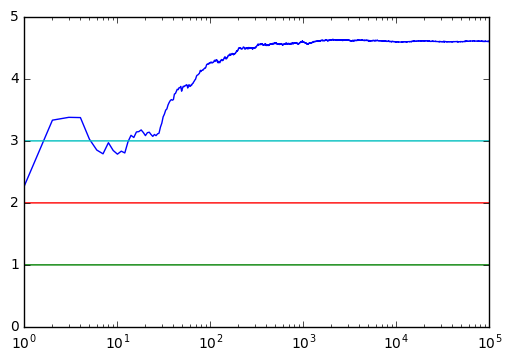

0.9941567792956416
1.9886066020447106
3.0014039033967514
4.012415181535645
5.004981562425846


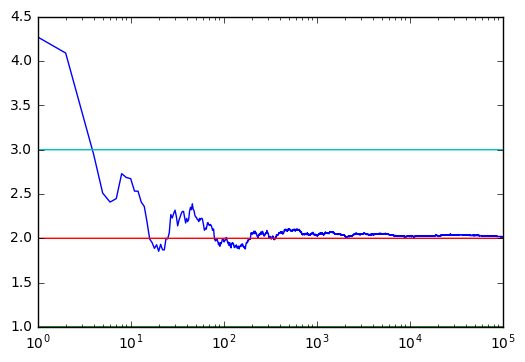

1.0031907899717705
1.992635381202085
3.0172245151023374
0.10581387687713856
4.000896541666238


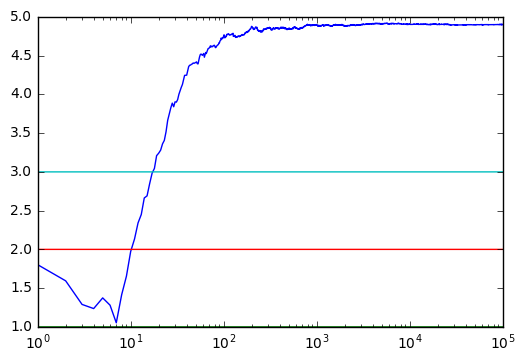

1.0047894724786968
1.9521185809094692
3.000748485214486
4.00347336263288
5.001999187347205


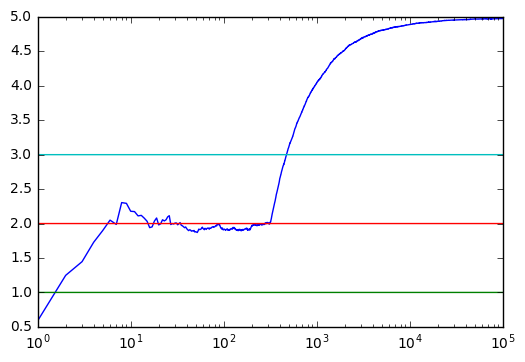

0.9351918393129013
1.9855429609047932
3.273767753027493
4.051058188004465
5.003036356066832


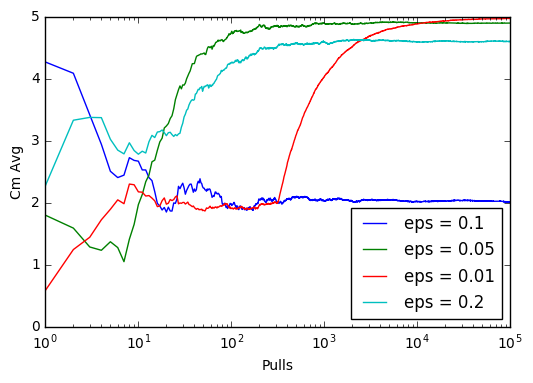

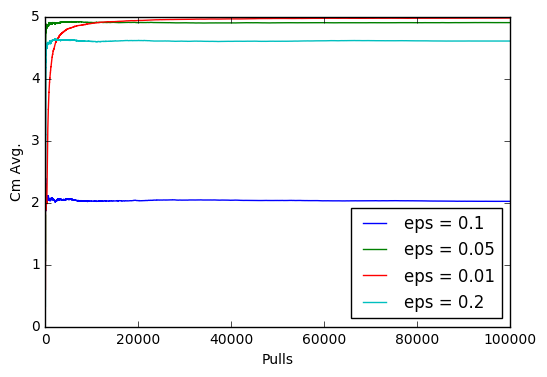

In [20]:
#perform the experiment 4 times, each with a different epsilon
if __name__ == '__main__':
  c_2 = run_experiment2(1.0, 2.0, 3.0, 4.0, 5.0, 0.2, 100000)
  c_1 = run_experiment2(1.0, 2.0, 3.0, 0.1, 4.0, 5.0, 100000)
  c_05 = run_experiment2(1.0, 2.0, 3.0, 4.0, 5.0, 0.05, 100000)
  c_01 = run_experiment2(1.0, 2.0, 3.0, 4.0, 5.0, 0.01, 100000)


  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg')
  plt.xscale('log')
  plt.legend(loc='lower right')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_2, label='eps = 0.2')
  plt.xlabel('Pulls')
  plt.ylabel('Cm Avg.')
  plt.legend(loc='lower right')
  plt.show()
